In [1]:
!pip install pyrenn
import pyrenn
import numpy as np
from matplotlib import pyplot as plt

  Created wheel for pyrenn: filename=pyrenn-0.1-py3-none-any.whl size=9257 sha256=495de03cf8b9601ca25d191d0f2ae695dc83d43c60cbb3413f7469b05f709587
  Stored in directory: /root/.cache/pip/wheels/00/36/ed/55abd022626413ad5e39d84b25cdd487f4ee8b38ba59e5aa29
Successfully built pyrenn


обучающее множество

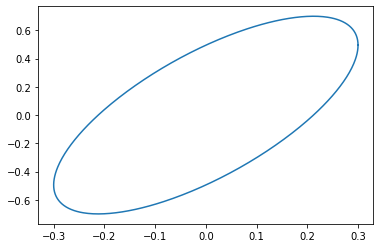

In [2]:
t = np.linspace(0, 2 * np.pi, 500, endpoint=True)
x = 0.3*np.cos(t)
y = 0.7*np.sin(t + np.pi/4)

#data = np.column_stack((x, y))
data = np.array([x, y])
plt.plot(data[0],data[1])
plt.show()

автоассоциативная сеть с узким горлом

выделяем первую главную компоненту

In [3]:
nn = pyrenn.CreateNN([2, 1, 2])
nn = pyrenn.train_LM(data, data, nn, k_max=100)
print('MSE: {}'.format(nn['ErrorHistory'][-1]))

Maximum number of iterations reached
MSE: 10.221842317492177


восстанавливаем

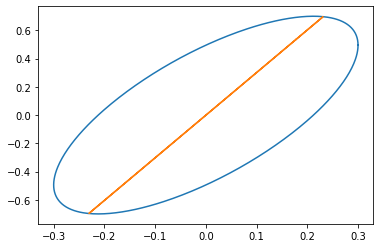

In [4]:
pred = pyrenn.NNOut(data, nn)
plt.plot(data[0],data[1])
plt.plot(pred[0],pred[1])
plt.show()

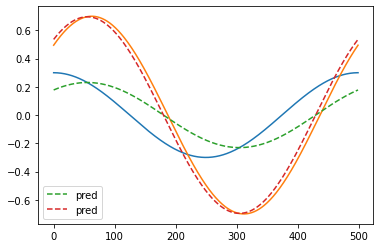

In [7]:
plt.plot(data.T, '-')
plt.plot(pred.T, '--', label="pred")
plt.legend()
plt.show()

аппроксимация кривой

выделяем первую нелинейную главную компоненту

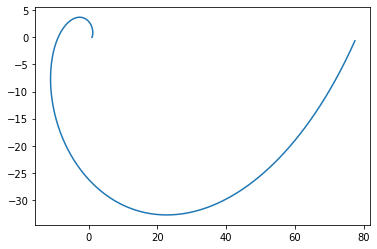

In [8]:
phi = np.arange(0, 2 * np.pi, 0.025)
r = 2**phi
x = r*np.cos(phi)
y = r*np.sin(phi)
data = np.array([x, y])
plt.plot(x,y)
plt.show()

In [9]:
nn2 = pyrenn.CreateNN([2, 15, 1, 15, 2])
nn2 = pyrenn.train_LM(data, data, nn2, k_max=100)
print('MSE: {}'.format(nn2['ErrorHistory'][-1]))

Maximum number of iterations reached
MSE: 0.027382600490715014


In [10]:
pred = pyrenn.NNOut(data, nn2)

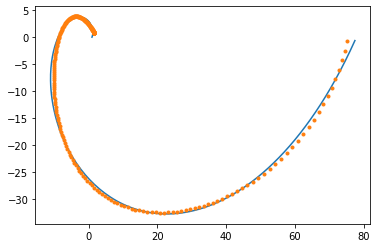

In [12]:
plt.plot(x,y)
plt.plot(pred[0], pred[1], '.')
plt.show()

аппроксимация пространственной кривой

выделяем две старшие нелинейные главные компоненты

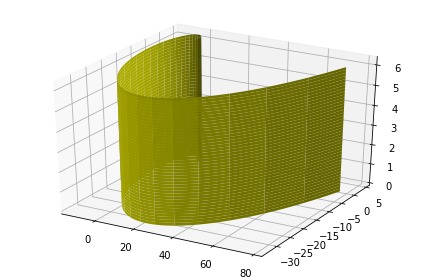

In [ ]:
z = phi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z.reshape(-1,1), color='y')
fig.tight_layout()

In [ ]:
nn3 = pyrenn.CreateNN([2, 10, 2,  10, 1])
nn3 = pyrenn.train_LM(np.array([x, z]), y, nn3, k_max=1000)
print('MSE: {}'.format(nn3['ErrorHistory'][-1]))

Maximum number of iterations reached
MSE: 2.3298469767131663e-08


In [ ]:
pred = pyrenn.NNOut(np.array([x, z]), nn3)

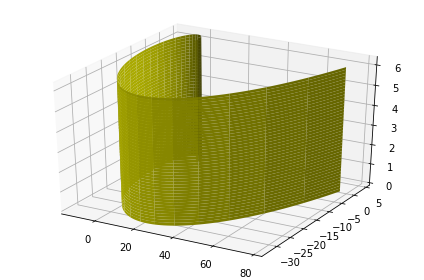

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, pred, z.reshape(-1,1), color='y')
fig.tight_layout()